In [1]:
#数据导入
import zipfile
import numpy as np
import pandas as pd

In [2]:
import  os
print (os.getcwd())

C:\Users\dell\dockerdata\乘用车细分市场销量预测


In [31]:
intf=lambda x:int(x)

In [3]:
filename='data/Train.zip'
with zipfile.ZipFile(filename,mode='r') as trainzipfile:
    trainzipfile.extractall(path='data')
'''    trainzip_names=trainzipfile.namelist()
    with trainzipfile.open(trainzip_names[0]) as trainfile:
        train_data_origin=pd.read_csv(trainfile,dtype='str')'''


"    trainzip_names=trainzipfile.namelist()\n    with trainzipfile.open(trainzip_names[0]) as trainfile:\n        train_data_origin=pd.read_csv(trainfile,dtype='str')"

In [4]:
import os 
print (os.getcwd())
!dir data

C:\Users\dell\dockerdata\乘用车细分市场销量预测
 驱动器 C 中的卷没有标签。
 卷的序列号是 0006-FDC5

 C:\Users\dell\dockerdata\乘用车细分市场销量预测\data 的目录

2019/09/11  14:12    <DIR>          .
2019/09/11  14:12    <DIR>          ..
2019/09/11  13:30           237,991 evaluation_public.csv
2019/09/11  13:31            51,712 submit_example.csv
2019/08/23  17:36           369,997 Train.zip
2019/09/12  15:33         1,545,277 train_sales_data.csv
2019/09/12  15:33         1,399,503 train_search_data.csv
2019/09/12  15:33            47,975 train_user_reply_data.csv
               6 个文件      3,652,455 字节
               2 个目录 49,272,320,000 可用字节


In [5]:
# 探索性数据分析

In [18]:
train_sales_data=pd.read_csv('data/train_sales_data.csv',dtype='str')
train_sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31680 entries, 0 to 31679
Data columns (total 7 columns):
province       31680 non-null object
adcode         31680 non-null object
model          31680 non-null object
bodyType       31680 non-null object
regYear        31680 non-null object
regMonth       31680 non-null object
salesVolume    31680 non-null object
dtypes: object(7)
memory usage: 1.7+ MB


In [7]:
train_sales_data.head()

,province,adcode,model,bodyType,regYear,regMonth,salesVolume
0,上海,310000,3c974920a76ac9c1,SUV,2016,1,292
1,云南,530000,3c974920a76ac9c1,SUV,2016,1,466
2,内蒙古,150000,3c974920a76ac9c1,SUV,2016,1,257
3,北京,110000,3c974920a76ac9c1,SUV,2016,1,408
4,四川,510000,3c974920a76ac9c1,SUV,2016,1,610


In [8]:
train_sales_data.describe()

,province,adcode,model,bodyType,regYear,regMonth,salesVolume
count,31680,31680,31680,31680,31680,31680,31680
unique,22,22,60,4,2,12,2965
top,北京,350000,d0f245b8781e3631,Sedan,2016,6,105
freq,1440,1440,528,14256,15840,2640,73


In [9]:
from datetime import datetime
train_sales_data['salesVolume']=train_sales_data['salesVolume'].map(lambda x:int(x))
train_sales_data['ym']=train_sales_data['regYear']+'-'+train_sales_data['regMonth'].map(lambda x:('0'+x) if len(x)==1 else x)
train_sales_data['date']=train_sales_data['ym'].map(lambda x:datetime.strptime(x,'%Y-%m'))

In [10]:
train_sales_data.head()

,province,adcode,model,bodyType,regYear,regMonth,salesVolume,ym,date
0,上海,310000,3c974920a76ac9c1,SUV,2016,1,292,2016-01,2016-01-01
1,云南,530000,3c974920a76ac9c1,SUV,2016,1,466,2016-01,2016-01-01
2,内蒙古,150000,3c974920a76ac9c1,SUV,2016,1,257,2016-01,2016-01-01
3,北京,110000,3c974920a76ac9c1,SUV,2016,1,408,2016-01,2016-01-01
4,四川,510000,3c974920a76ac9c1,SUV,2016,1,610,2016-01,2016-01-01


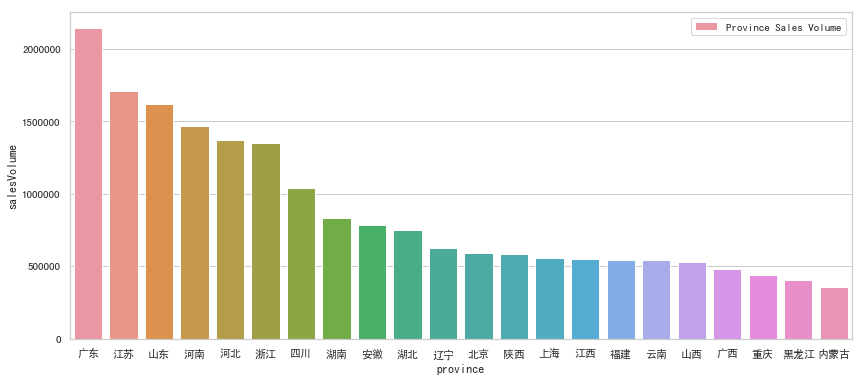

In [18]:
# province volume,22 provinces
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

pro_sales_data=train_sales_data[['province','salesVolume']].groupby('province').sum().reset_index()
pro_sales_data=pro_sales_data.sort_values(by='salesVolume',ascending=False)

from matplotlib.font_manager import FontProperties
#myfont=FontProperties(fname=r'C:\Users\dell\dockerdata\simhei.ttf')
sns.set(font=['sans-serif'])
sns.set_style("whitegrid",{"font.sans-serif":['simhei']})

#sns.set(style='whitegrid')
f,ax=plt.subplots(figsize=(14,6))
sns.barplot(x='province',y='salesVolume',data=pro_sales_data,label='Province Sales Volume')
ax.legend()
plt.show()

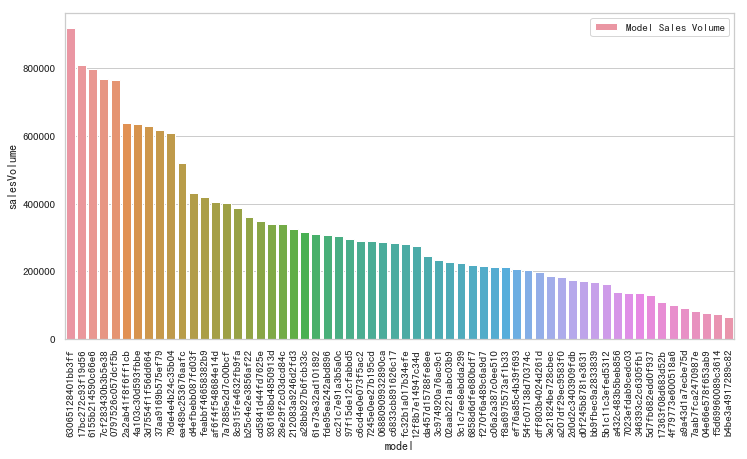

In [69]:
# model sales volume ,60 models
model_sales_data=train_sales_data[['model','salesVolume']].groupby(by='model').sum()\
            .reset_index().sort_values(by='salesVolume',ascending=False)

sns.set(font=['sans-serif'])
sns.set_style('whitegrid',{"font.sans-serif":['simhei']})
f,ax=plt.subplots(figsize=(12,6))
g=sns.barplot(x='model',y='salesVolume',data=model_sales_data,label='Model Sales Volume')
ax.legend()
plt.setp(ax.get_xticklabels(), rotation=90);
plt.show()

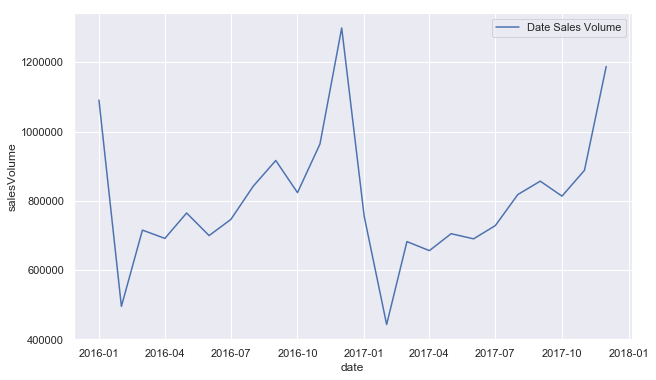

In [56]:
# date sales volume,24 months
date_sales_data=train_sales_data[['date','salesVolume']].groupby(by='date').sum().reset_index(). \
                sort_values(by='date',ascending=True)
sns.set(font=['sans-serif'])
sns.set_style('darkgrid',{'font.sans-seris':['simhei']})
fig,ax=plt.subplots(figsize=(10,6))
sns.lineplot(x='date',y='salesVolume',data=date_sales_data,label='Date Sales Volume')


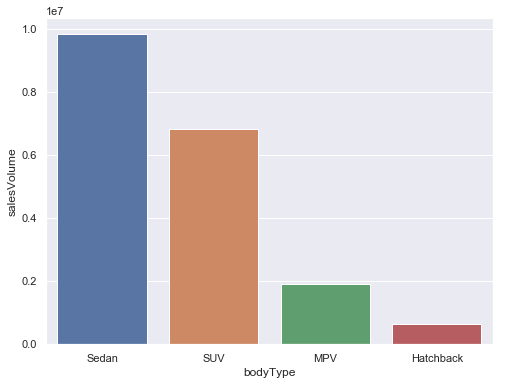

In [72]:
# bodytype sales volume
bodytype_sales_data=train_sales_data[['bodyType','salesVolume']].groupby(by='bodyType').sum()\
        .reset_index().sort_values('salesVolume',ascending=False)
fig,ax=plt.subplots(figsize=(8,6))
sns.set(style='darkgrid')
sns.barplot(x='bodyType',y='salesVolume',data=bodytype_sales_data,label='Bodytype Sales Volume')
plt.show()

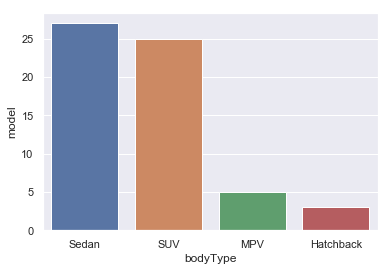

In [78]:
# model bodytype info
model_bodytype_info=train_sales_data[['model','bodyType']].drop_duplicates()
bodytype_volume=model_bodytype_info.groupby('bodyType').count().reset_index().sort_values('model',ascending=False)
sns.barplot(x='bodyType',y='model',data=bodytype_volume)

In [14]:
train_search_data=pd.read_csv('data/train_search_data.csv',dtype='str')
train_search_data['popularity']=train_search_data['popularity'].map(lambda x:int(x))
train_search_data.head()

,province,adcode,model,regYear,regMonth,popularity
0,河南,410000,17bc272c93f19d56,2016,1,19036
1,河南,410000,17bc272c93f19d56,2016,2,17856
2,河南,410000,17bc272c93f19d56,2016,3,12517
3,河南,410000,17bc272c93f19d56,2016,4,9700
4,河南,410000,17bc272c93f19d56,2016,5,12780


In [16]:
pro_pop_data=train_search_data[['province','popularity']].groupby('province').sum().reset_index().\
            sort_values(by='popularity',ascending=False)
pro_pop_data.head()

,province,popularity
8,广东,8374724
10,江苏,6223246
6,山东,5836408
13,河南,5747057
14,浙江,5394094


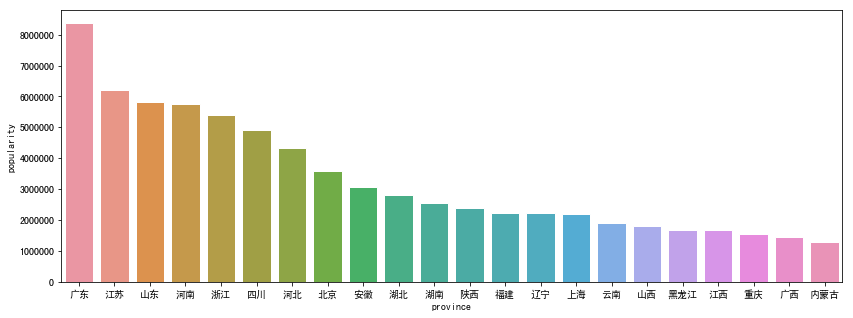

In [17]:
%matplotlib inline
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

fig,ax=plt.subplots(figsize=(14,5))
sns.set(font=['sans-serif'])
sns.set_style('whitegrid',{'font.sans-serif':['simhei']})
sns.barplot(x='province',y='popularity',data=pro_pop_data,label='popularity of province')
plt.show()


In [22]:
train_sales_search_data=pd.merge(train_sales_data,train_search_data,on=['province','regYear','regMonth',\
                                                                        'model','adcode'],how='left')
train_sales_search_data['salesVolume']=train_sales_search_data['salesVolume'].map(lambda x:int(x))
train_sales_search_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31680 entries, 0 to 31679
Data columns (total 8 columns):
province       31680 non-null object
adcode         31680 non-null object
model          31680 non-null object
bodyType       31680 non-null object
regYear        31680 non-null object
regMonth       31680 non-null object
salesVolume    31680 non-null int64
popularity     31680 non-null int64
dtypes: int64(2), object(6)
memory usage: 2.2+ MB


In [24]:
province_sales_popularity_data=train_sales_search_data[['province','popularity','salesVolume']].\
        groupby('province').sum().reset_index().sort_values(by='salesVolume',ascending=False)
province_sales_popularity_data.head()

,province,popularity,salesVolume
8,广东,8374724,2145301
10,江苏,6223246,1711484
6,山东,5836408,1616928
13,河南,5747057,1470908
12,河北,4347799,1372210


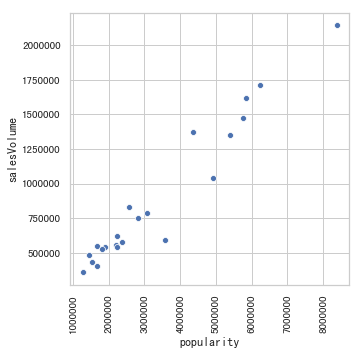

In [29]:
fig,ax=plt.subplots(figsize=(5,5))
sns.scatterplot(x='popularity',y='salesVolume',data=province_sales_popularity_data)
plt.setp(ax.get_xticklabels(),rotation=90)
plt.show()

In [32]:
train_user_reply_data=pd.read_csv('data/train_user_reply_data.csv',dtype='str')
train_user_reply_data['carCommentVolum']=train_user_reply_data['carCommentVolum'].map(intf)
train_user_reply_data['newsReplyVolum']=train_user_reply_data['newsReplyVolum'].map(intf)
train_user_reply_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1440 entries, 0 to 1439
Data columns (total 5 columns):
model              1440 non-null object
regYear            1440 non-null object
regMonth           1440 non-null object
carCommentVolum    1440 non-null int64
newsReplyVolum     1440 non-null int64
dtypes: int64(2), object(3)
memory usage: 56.3+ KB


In [43]:
train_data=pd.merge(train_sales_search_data,train_user_reply_data,on=['model','regYear','regMonth'],how='left')
train_data.tail()

,province,adcode,model,bodyType,regYear,regMonth,salesVolume,popularity,carCommentVolum,newsReplyVolum
31675,福建,350000,a9a43d1a7ecbe75d,SUV,2017,12,112,772,339,377
31676,辽宁,210000,a9a43d1a7ecbe75d,SUV,2017,12,104,1049,339,377
31677,重庆,500000,a9a43d1a7ecbe75d,SUV,2017,12,125,654,339,377
31678,陕西,610000,a9a43d1a7ecbe75d,SUV,2017,12,265,1516,339,377
31679,黑龙江,230000,a9a43d1a7ecbe75d,SUV,2017,12,58,736,339,377


In [42]:
train_data.describe()

,salesVolume,popularity,carCommentVolum,newsReplyVolum
count,31680.000000,31680.000000,31680.000000,31680.000000
mean,608.709122,2311.965941,250.479167,1989.809722
std,779.076734,2980.547086,318.648963,2324.517694
min,2.000000,25.000000,0.000000,0.000000
25%,182.000000,700.000000,54.000000,335.000000
50%,363.000000,1445.500000,149.500000,1432.500000
75%,737.000000,2816.000000,307.000000,2712.000000
max,15317.000000,116300.000000,2834.000000,20770.000000


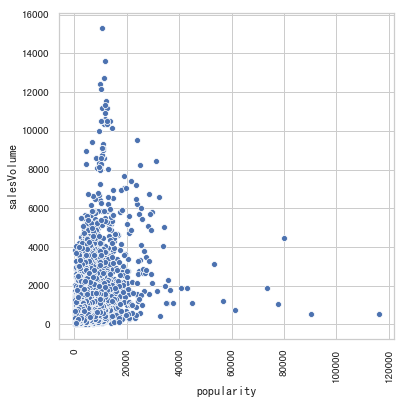

In [39]:
fig,ax=plt.subplots(figsize=(6,6))
sns.scatterplot(x='popularity',y='salesVolume',data=train_data)
plt.setp(ax.get_xticklabels(),rotation=90)
plt.show()

In [45]:
pairwise_data=train_data[['model','popularity','carCommentVolum','newsReplyVolum','salesVolume']].\
        groupby('model').sum().reset_index()
pairwise_data.head()

,model,popularity,carCommentVolum,newsReplyVolum,salesVolume
0,02aab221aabc03b9,323055,260920,827860,228508
1,04e66e578f653ab9,607272,36938,561044,77771
2,06880909932890ca,598465,57156,351846,285154
3,0797526c057dcf5b,761409,213070,1410112,764605
4,12f8b7e14947c34d,962082,212234,1296482,274178


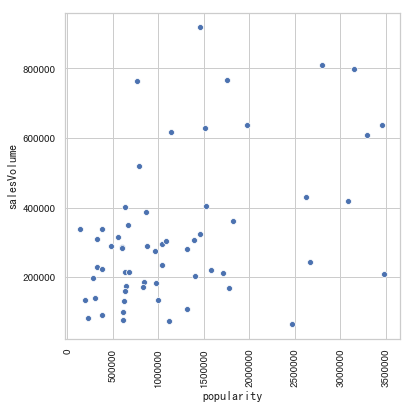

In [46]:
figure,ax=plt.subplots(figsize=(6,6))
sns.scatterplot(x='popularity',y='salesVolume',data=pairwise_data)
plt.setp(ax.get_xticklabels(),rotation=90)
plt.show()

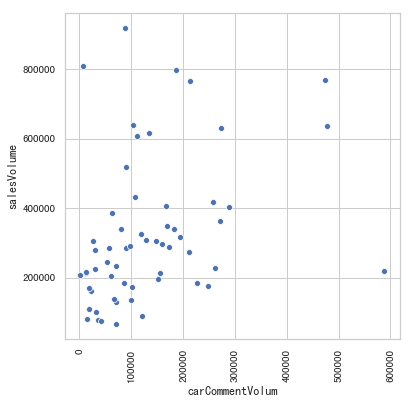

In [47]:
figure,ax=plt.subplots(figsize=(6,6))
sns.scatterplot(x='carCommentVolum',y='salesVolume',data=pairwise_data)
plt.setp(ax.get_xticklabels(),rotation=90)
plt.show()

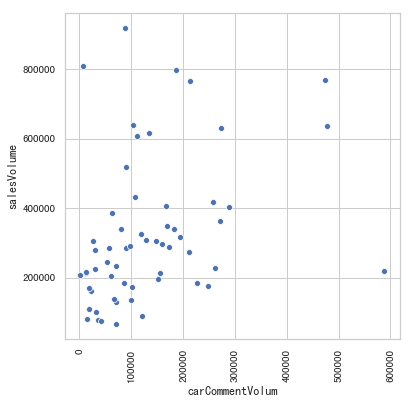

In [48]:
figure,ax=plt.subplots(figsize=(6,6))
sns.scatterplot(x='carCommentVolum',y='salesVolume',data=pairwise_data)
plt.setp(ax.get_xticklabels(),rotation=90)
plt.show()

In [50]:
month_pairwise_data=train_data[['regMonth','popularity','carCommentVolum','newsReplyVolum','salesVolume']].\
        groupby('regMonth').sum().reset_index()
month_pairwise_data.head()

,regMonth,popularity,carCommentVolum,newsReplyVolum,salesVolume
0,1,6468461,316822,4686088,1847111
1,10,6275266,891220,5625620,1637843
2,11,6017261,784850,5805734,1852554
3,12,6755613,738936,4122052,2486533
4,2,7027532,402820,4990854,939919


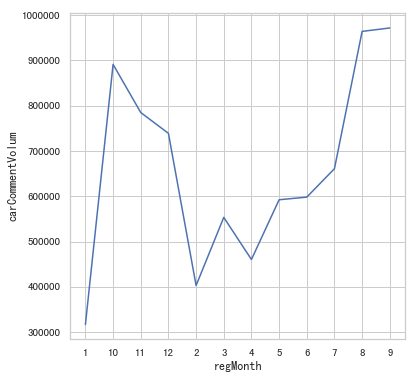

In [55]:
figure,ax=plt.subplots(figsize=(6,6))
sns.lineplot(x='regMonth',y='carCommentVolum',data=month_pairwise_data)
#plt.setp(ax.get_xticklabels(),rotation=90)
plt.show()

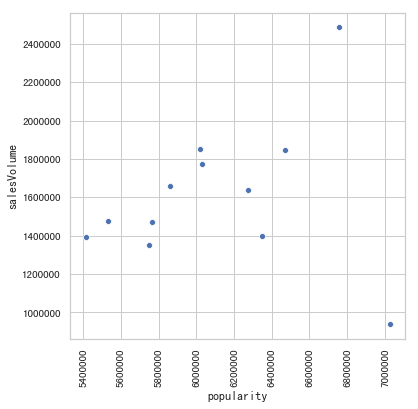

In [51]:
figure,ax=plt.subplots(figsize=(6,6))
sns.scatterplot(x='popularity',y='salesVolume',data=month_pairwise_data)
plt.setp(ax.get_xticklabels(),rotation=90)
plt.show()